In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/NU courses/CIVE 7381/'

In [3]:
dF = pd.read_excel(file_path + 'ps1_data.xlsx')
dF.head()

,OBSERVATION,DUR,CITY,CAMP,EDUC,EXPEND ($),INC ($)
0,1,0,1,0,4,852.57,29900.51
1,2,0,0,0,4,380.57,16407.33
2,3,1,0,0,1,465.10,28349.23
3,4,0,0,0,2,356.60,18945.16
4,5,1,1,0,2,718.78,31637.53


In [4]:
desc_stats = dF.describe()

# Replace sample std with population std
desc_stats.loc['std'] = dF.std(ddof=0)

desc_stats

,OBSERVATION,DUR,CITY,CAMP,EDUC,EXPEND ($),INC ($)
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,100.50,0.17,0.32,0.00,1.95,548.25,24858.08
std,57.73,0.38,0.46,0.00,1.75,142.11,6544.02
min,1.00,0.00,0.00,0.00,0.00,191.24,6530.64
25%,50.75,0.00,0.00,0.00,1.00,454.91,20366.88
50%,100.50,0.00,0.00,0.00,1.00,542.94,24017.10
75%,150.25,0.00,1.00,0.00,3.00,646.74,29534.37
max,200.00,1.00,1.00,0.00,8.00,908.65,47858.15


In [5]:
four_attributes = ['EXPEND ($)', 'DUR', 'INC ($)', 'EDUC']
desc_stats[four_attributes].iloc[1:3]

,EXPEND ($),DUR,INC ($),EDUC
mean,548.25,0.17,24858.08,1.95
std,142.11,0.38,6544.02,1.75


In [6]:
pd.set_option('display.float_format', '{:.5f}'.format)

corr_matrix = dF[four_attributes].corr()
corr_matrix

,EXPEND ($),DUR,INC ($),EDUC
EXPEND ($),1.00000,-0.10310,0.59626,0.12096
DUR,-0.10310,1.00000,0.05616,0.11932
INC ($),0.59626,0.05616,1.00000,-0.16138
EDUC,0.12096,0.11932,-0.16138,1.00000


In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)

cov_matrix = dF[four_attributes].cov()
cov_matrix

,EXPEND ($),DUR,INC ($),EDUC
EXPEND ($),20295.67,-5.53,557274.69,30.26
DUR,-5.53,0.14,138.75,0.08
INC ($),557274.69,138.75,43039437.94,-1858.96
EDUC,30.26,0.08,-1858.96,3.08


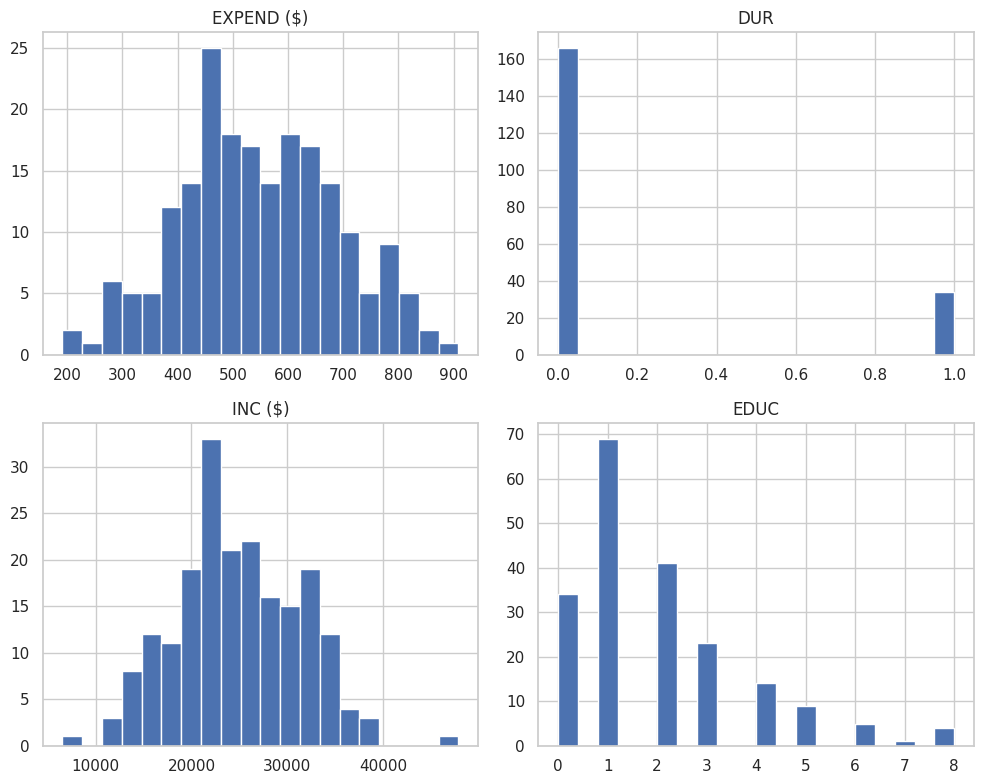

In [8]:
# Create a histogram for each of the four variables
dF[four_attributes].hist(bins=20, figsize=(10, 8), layout=(2, 2))

# Show the plot
plt.tight_layout()
plt.show()

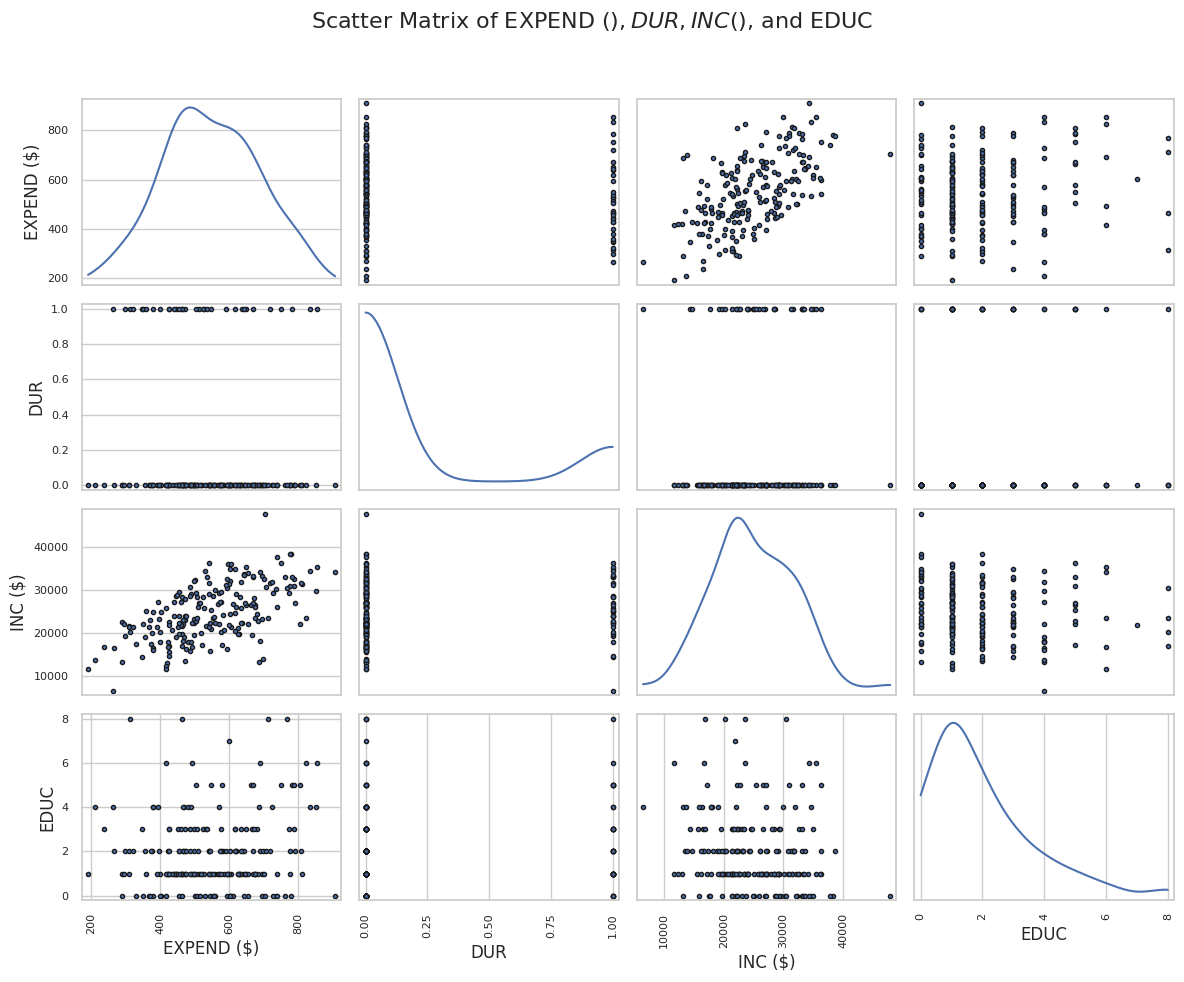

In [9]:
# Create a scatter matrix for the specified columns
scatter_matrix(dF[four_attributes],
               figsize=(12, 10),
               diagonal='kde',
               alpha=1,  # Adjust the transparency of the markers
               edgecolor='k')  # Add a white edge color to the markers for better contrast

plt.suptitle('Scatter Matrix of EXPEND ($), DUR, INC ($), and EDUC', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()

In [10]:
import plotly.express as px

# Create a scatter matrix (pair plot) using plotly
fig = px.scatter_matrix(dF[four_attributes],
                       dimensions=four_attributes,
                       labels={'EXPEND ($)': 'EXPEND ($)', 'DUR': 'DUR', 'INC ($)': 'INC ($)', 'EDUC': 'EDUC'})

# Show the plot
fig.update_layout(title={'x':0.5},  # Center the title
                  title_font_size=16)
fig.show()

In [11]:
num_samples = 5
sample_size = 40

sample_means = pd.DataFrame()

for i in range(num_samples):
    sample = dF.sample(n=sample_size, replace=False)  # Random sample without replacement
    sample_mean = sample.mean()
    sample_means[f'Sample {i+1}'] = sample_mean  # Store sample mean

# Transpose for better readability (samples as rows, variables as columns)
sample_means = sample_means.T

sample_means[four_attributes]

,EXPEND ($),DUR,INC ($),EDUC
Sample 1,547.13,0.20,25088.42,2.33
Sample 2,612.45,0.17,27026.91,2.40
Sample 3,520.71,0.20,23920.80,1.70
Sample 4,545.84,0.12,25020.18,2.33
Sample 5,499.35,0.25,22598.26,1.57


In [12]:
sample_means_1 = sample_means.drop(columns=['OBSERVATION'])
sample_means_1

,DUR,CITY,CAMP,EDUC,EXPEND ($),INC ($)
Sample 1,0.20,0.35,0.00,2.33,547.13,25088.42
Sample 2,0.17,0.35,0.00,2.40,612.45,27026.91
Sample 3,0.20,0.25,0.00,1.70,520.71,23920.80
Sample 4,0.12,0.25,0.00,2.33,545.84,25020.18
Sample 5,0.25,0.28,0.00,1.57,499.35,22598.26


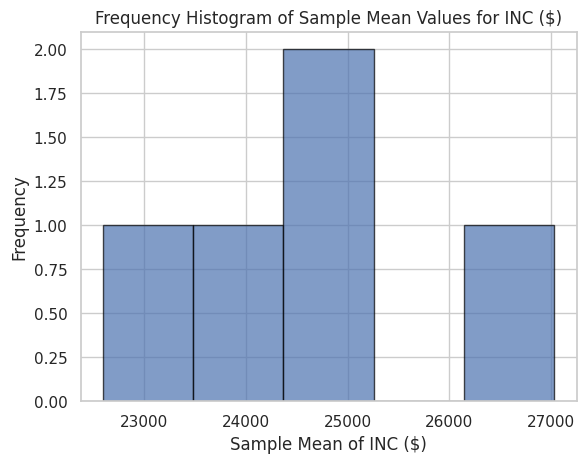

In [13]:
inc_sample_means = sample_means['INC ($)']

plt.hist(inc_sample_means, bins=5, edgecolor='black', alpha=0.7)
plt.title('Frequency Histogram of Sample Mean Values for INC ($)')
plt.xlabel('Sample Mean of INC ($)')
plt.ylabel('Frequency')
plt.show()


In [14]:
mean_of_means = inc_sample_means.mean()
variance_of_means = inc_sample_means.var()

print(f'Average of the sample means for INC ($): {mean_of_means:.2f}')
print(f'Variance of the sample means for INC ($): {variance_of_means:.2f}')

Average of the sample means for INC ($): 24730.92
Variance of the sample means for INC ($): 2671894.93


In [15]:
sample100 = dF.sample(100, replace=False)

desc_stats = sample100.describe()

# Replace sample std with population std
desc_stats.loc['std'] = sample100.std(ddof=0)

desc_stats[four_attributes].iloc[1:3]

,EXPEND ($),DUR,INC ($),EDUC
mean,537.61,0.12,24192.85,1.88
std,128.28,0.32,6259.93,1.65


In [16]:
sample175 = dF.sample(175, replace=False)

desc_stats = sample175.describe()

# Replace sample std with population std
desc_stats.loc['std'] = sample175.std(ddof=0)

desc_stats[four_attributes].iloc[1:3]

,EXPEND ($),DUR,INC ($),EDUC
mean,546.74,0.17,24962.23,1.92
std,141.06,0.38,6667.60,1.68


In [17]:
pd.set_option('display.float_format', '{:.5f}'.format)

corr_matrix = sample100[four_attributes].corr()
corr_matrix

,EXPEND ($),DUR,INC ($),EDUC
EXPEND ($),1.00000,0.01250,0.57948,0.16519
DUR,0.01250,1.00000,0.09774,0.04548
INC ($),0.57948,0.09774,1.00000,-0.11137
EDUC,0.16519,0.04548,-0.11137,1.00000


In [18]:
corr_matrix = sample175[four_attributes].corr()
corr_matrix

,EXPEND ($),DUR,INC ($),EDUC
EXPEND ($),1.00000,-0.08755,0.62990,0.08076
DUR,-0.08755,1.00000,0.03942,0.15720
INC ($),0.62990,0.03942,1.00000,-0.19461
EDUC,0.08076,0.15720,-0.19461,1.00000


In [19]:
pd.set_option('display.float_format', '{:.2f}'.format)

cov_matrix = sample100[four_attributes].cov()
cov_matrix

,EXPEND ($),DUR,INC ($),EDUC
EXPEND ($),16622.60,0.53,470046.30,35.34
DUR,0.53,0.11,200.84,0.02
INC ($),470046.30,200.84,39582510.96,-1162.66
EDUC,35.34,0.02,-1162.66,2.75


In [20]:
cov_matrix = sample175[four_attributes].cov()
cov_matrix

,EXPEND ($),DUR,INC ($),EDUC
EXPEND ($),20013.57,-4.68,595867.98,19.23
DUR,-4.68,0.14,99.63,0.10
INC ($),595867.98,99.63,44712398.79,-2190.12
EDUC,19.23,0.10,-2190.12,2.83


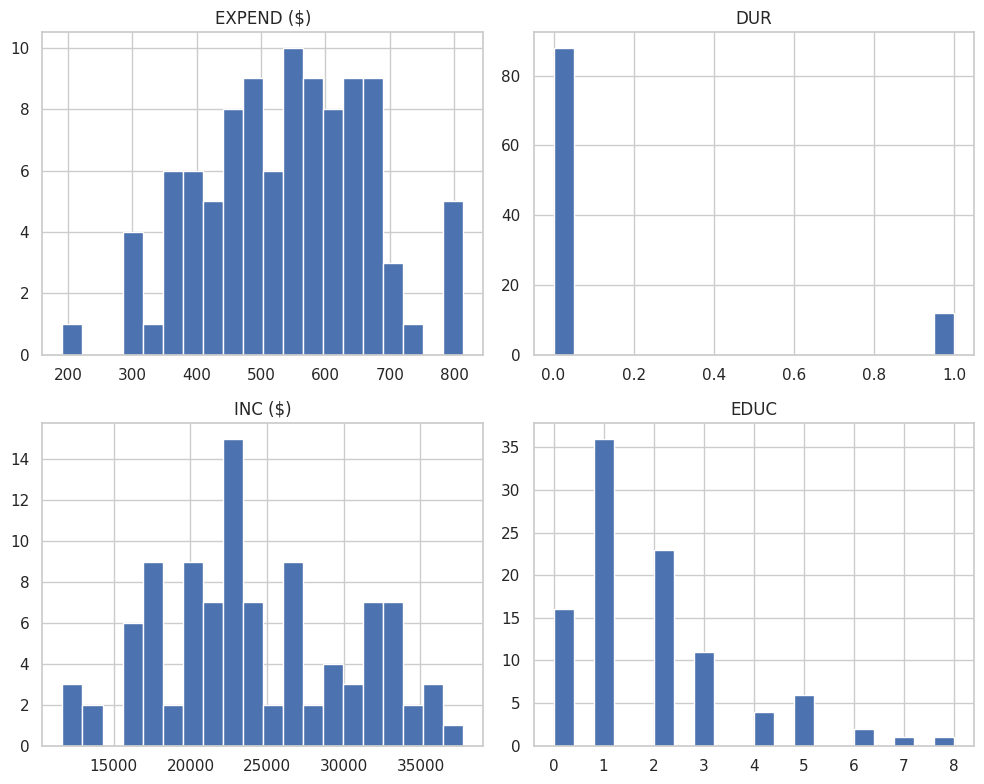

In [21]:
sample100[four_attributes].hist(bins=20, figsize=(10, 8), layout=(2, 2))

plt.tight_layout()
plt.show()

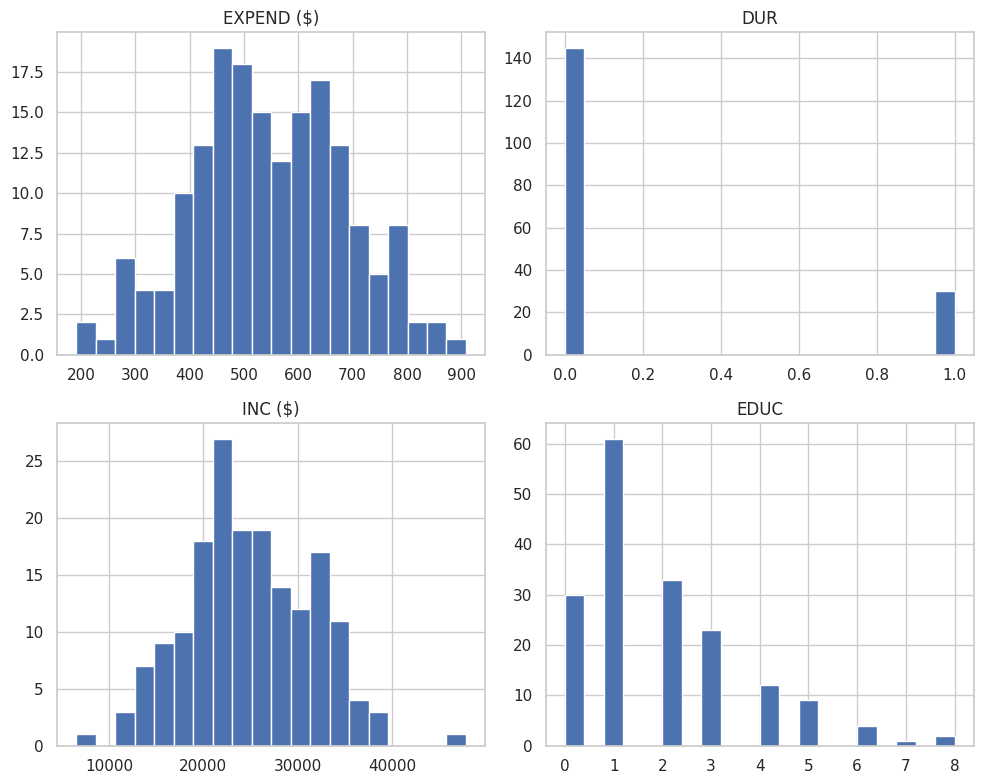

In [22]:
sample175[four_attributes].hist(bins=20, figsize=(10, 8), layout=(2, 2))

plt.tight_layout()
plt.show()

In [23]:
sample40 = dF.sample(40, replace=False)
sample175 = sample175

# Means and stdevs

mean_40 = sample40[four_attributes].mean()
std_40 = sample40[four_attributes].std()
size_40 = len(sample40)

mean_175 = sample175[four_attributes].mean()
std_175 = sample175[four_attributes].std()
size_175 = len(sample175)

# Z-score for 95% confidence level
z_score = 1.96

# Margin of error
margin_of_error_40 = z_score * (std_40 / np.sqrt(size_40))
margin_of_error_175 = z_score * (std_175 / np.sqrt(size_175))

# Construct the confidence intervals
ci_40 = pd.DataFrame({
    'Mean': mean_40,
    'CI Lower Bound': mean_40 - margin_of_error_40,
    'CI Upper Bound': mean_40 + margin_of_error_40
})

ci_175 = pd.DataFrame({
    'Mean': mean_175,
    'CI Lower Bound': mean_175 - margin_of_error_175,
    'CI Upper Bound': mean_175 + margin_of_error_175
})

In [24]:
ci_40

,Mean,CI Lower Bound,CI Upper Bound
EXPEND ($),546.25,508.76,583.74
DUR,0.10,0.01,0.19
INC ($),25200.85,23325.92,27075.78
EDUC,1.62,1.12,2.13


In [25]:
ci_175

,Mean,CI Lower Bound,CI Upper Bound
EXPEND ($),546.74,525.78,567.70
DUR,0.17,0.12,0.23
INC ($),24962.23,23971.51,25952.95
EDUC,1.92,1.67,2.17


In [26]:
mean_175_inc = mean_175.values[2]
std_175_inc = std_175.values[2]

n = size_175

# Hypothesized population mean
mu_0 = 25000

# the t-statistic
t_statistic = (mean_175_inc - mu_0) / (std_175_inc / np.sqrt(n))

# Find the critical t-value for a two-tailed test at alpha = 0.05
alpha = 0.05
df = n - 1  # Degrees of freedom
critical_value = stats.t.ppf(1 - alpha / 2, df)  # Two-tailed test

# Display the results
print(f'T-statistic: {t_statistic:.4f}')
print(f'Critical t-value: {critical_value:.4f}')

# Make a decision
if np.abs(t_statistic) > critical_value:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-statistic: -0.0747
Critical t-value: 1.9737
Fail to reject the null hypothesis.


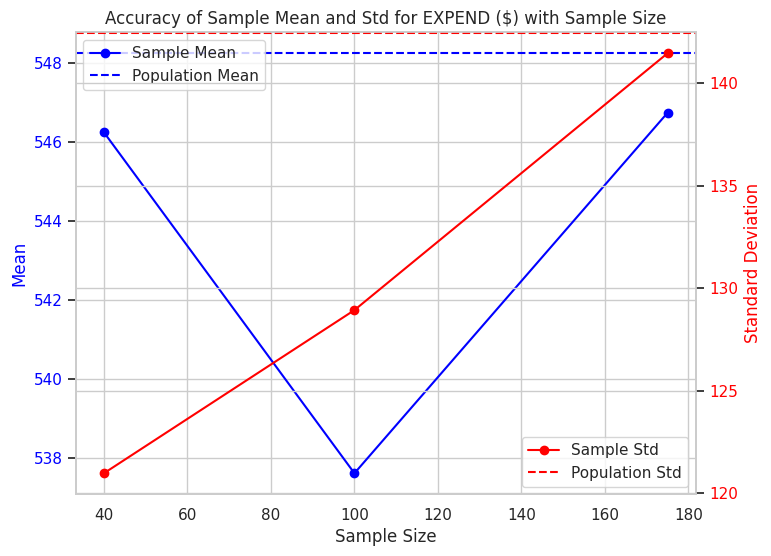

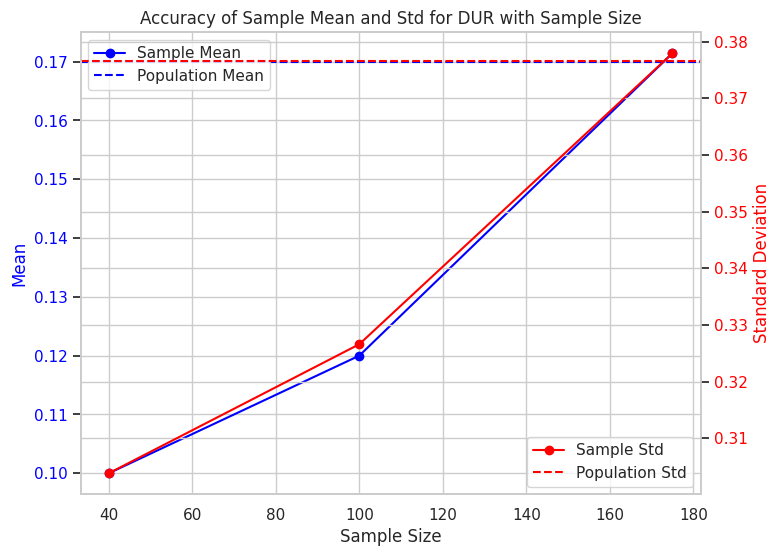

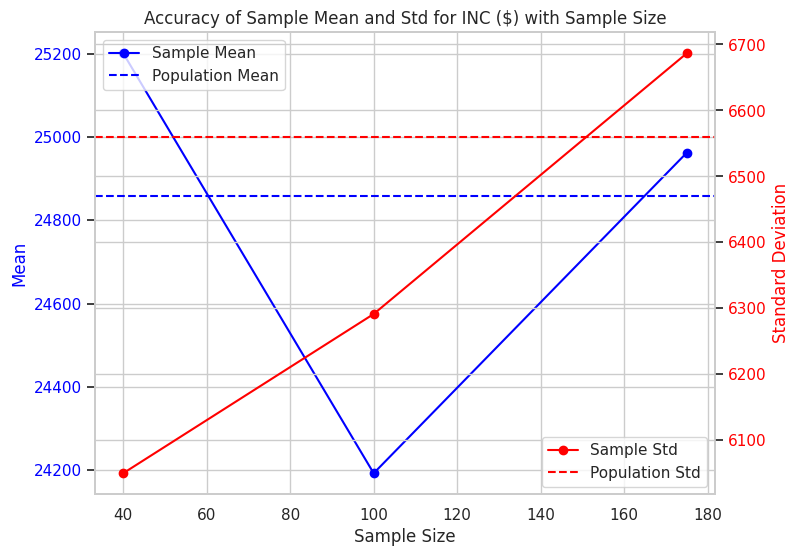

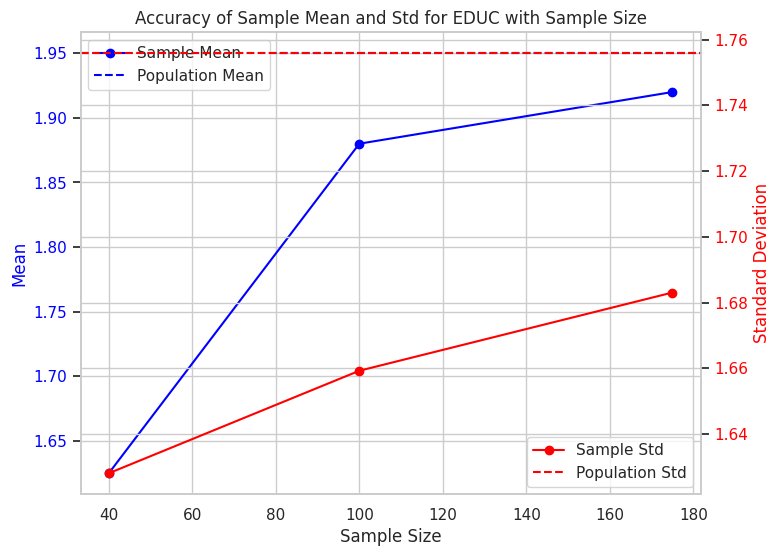

In [27]:
pop_means = dF[four_attributes].mean()
pop_stds = dF[four_attributes].std()

# Calculate sample means and standard deviations for each sample
sample_means = {
    'sample40': sample40[four_attributes].mean(),
    'sample100': sample100[four_attributes].mean(),
    'sample175': sample175[four_attributes].mean()
}

sample_stds = {
    'sample40': sample40[four_attributes].std(),
    'sample100': sample100[four_attributes].std(),
    'sample175': sample175[four_attributes].std()
}

# Define sample sizes
sample_sizes = [40, 100, 175]

# Plot for each feature
for feature in four_attributes: # removed extra brackets around four_attributes
    fig, ax1 = plt.subplots(figsize=(8, 6))

    # Extract sample means and stds for the current feature
    means = [sample_means['sample40'][feature], sample_means['sample100'][feature], sample_means['sample175'][feature]]
    stds = [sample_stds['sample40'][feature], sample_stds['sample100'][feature], sample_stds['sample175'][feature]]

    # Plot sample means
    ax1.set_xlabel('Sample Size')
    ax1.set_ylabel('Mean', color='blue')
    ax1.plot(sample_sizes, means, 'bo-', label='Sample Mean', color='blue')
    ax1.axhline(y=pop_means[feature], color='blue', linestyle='--', label='Population Mean') #pop_means[feature] will now return a single value
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot sample standard deviations
    ax2 = ax1.twinx()
    ax2.set_ylabel('Standard Deviation', color='red')
    ax2.plot(sample_sizes, stds, 'ro-', label='Sample Std', color='red')
    ax2.axhline(y=pop_stds[feature], color='red', linestyle='--', label='Population Std')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')

    # Add a title
    plt.title(f'Accuracy of Sample Mean and Std for {feature} with Sample Size')

    # Show the plot
    plt.show()